## Import the required libraries

In [1]:
from enum import IntEnum
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# Question 1: The CS 464 Case

## Enumerate the study habits and grades

In [2]:
class StudyHabits(IntEnum):
    MOTIVATED = 0
    UNMOTIVATED = 1

In [3]:
class Grades(IntEnum):
    HIGH = 0
    LOW = 1
    FAILING = 2

## Construct the probability matrix

0.87 of the high grades are received by the motivated students.
0.21 of the low grades are received by the motivated students.
0.04 of the failing grades are received by the motivated students.

These imply that
0.13 of the high grades are received by the unmotivated students.
0.79 of the low grades are received by the unmotivated students.
0.96 of the failing grades are received by the unmotivated students.

Multiplying these with the following probabilities will give us the ratios of all the probabilities.

$$P(H) = 0.64$$
$$P(L) = 0.21$$
$$P(F) = 0.04$$

The calculations can be seen on the following cell. The rows represent the grades and the columns represent the motivation of the student.

Notice that the sum of elements in the same row give $P(H)$, $P(L)$, $P(F)$, respectively.

The individual probabilities are obtained from the matrix with as following:

P[The grade (H, L or F)][The motivation of the student (Motivated or Unmotivated)]

In [4]:
P = np.empty(shape=(len(Grades), len(StudyHabits)))

P[Grades.HIGH, StudyHabits.MOTIVATED] = 0.87
P[Grades.LOW, StudyHabits.MOTIVATED] = 0.21
P[Grades.FAILING, StudyHabits.MOTIVATED] = 0.04

P[..., StudyHabits.UNMOTIVATED] = 1 - P[..., StudyHabits.MOTIVATED]
    
P[Grades.HIGH] *= 0.64
P[Grades.LOW] *= 0.24
P[Grades.FAILING] *= 0.12

P

array([[0.5568, 0.0832],
       [0.0504, 0.1896],
       [0.0048, 0.1152]])

## Question 1.1: What is the probability that a student is motivated?

$P(S_M)$

In [5]:
P[..., StudyHabits.MOTIVATED].sum()

0.612

## Question 1.2: If a student is motivated, what is the probability that he/she will get a high grade?

$P(H|S_M) = \dfrac{P(H, S_M)}{P(S_M)}$

In [6]:
P[Grades.HIGH, StudyHabits.MOTIVATED] / P[..., StudyHabits.MOTIVATED].sum()

0.9098039215686274

## Question 1.3: If a student is unmotivated, what is the probability that he/she will get a high grade?

$P(H|S_U) = \dfrac{P(H, S_U)}{P(S_U)}$

In [7]:
P[Grades.HIGH, StudyHabits.UNMOTIVATED] / P[..., StudyHabits.UNMOTIVATED].sum()

0.21443298969072166

# Question 2: Sports News Classification

In [8]:
PROJECT_ROOT_DIR = Path().resolve()
DATA_PATH = PROJECT_ROOT_DIR / 'dataset'

In [9]:
[file.name for file in DATA_PATH.iterdir()]

['bbcsports_val.csv', 'bbcsports_train.csv']

In [10]:
TRAIN_DATA_PATH = DATA_PATH / 'bbcsports_train.csv'
VALID_DATA_PATH = DATA_PATH / 'bbcsports_val.csv'

In [11]:
data_train = pd.read_csv(TRAIN_DATA_PATH)
data_valid = pd.read_csv(VALID_DATA_PATH)

In [12]:
data_train.head()

,claxton,hunt,first,major,medal,british,hurdler,sarah,confid,win,...,massu,mcenro,mauresmo,ameli,hip,fiveset,mario,ancic,lundgren,class_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2


In [13]:
data_valid.head()

,claxton,hunt,first,major,medal,british,hurdler,sarah,confid,win,...,massu,mcenro,mauresmo,ameli,hip,fiveset,mario,ancic,lundgren,class_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [14]:
len(data_train), len(data_valid)

(552, 185)

## Question 2.1.1: How are the classes distributed in the training set? Give the number of instances in each class with a suitable plot. Any plot that shows the class distribution is acceptable.

In [15]:
data_train[['class_label']].value_counts(sort=True)

class_label
2              198
3              114
1               86
0               77
4               77
dtype: int64

We can see that the number of instances that belong to the second class approximately twice of the number of instances for each of the other classes.

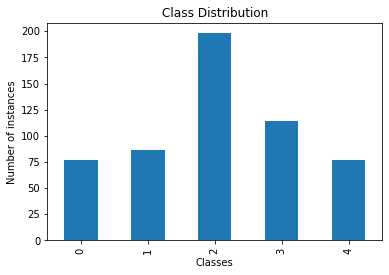

In [16]:
data_train[['class_label']].value_counts(sort=False).plot(kind='bar')
plt.title('Class Distribution')
plt.xticks(ticks=list(range(5)), labels=list(range(5)))
plt.xlabel('Classes')
plt.ylabel('Number of instances')
plt.show()

## Question 2.1.2: Is the training set balanced or skewed towards one of the classes? Do you think having an imbalanced training set affects your model? If yes, please explain how it affects the Naive Bayes model and propose a possible solution if needed.

The training set is imbalanced though the imbalance is not extreme. The class 2 is dominant in the training set, and this causes bias in the weights of the Naive Bayes classifier. If the imbalanced class distribution in the training set does not match with the true class distribution, the priors $P(Y = y_k)$ will be misleading, that is the probability of the minority class will be very small because of the imbalance. In these cases, ignoring the prior might give better results.

In addition, if the number of training examples are not sufficient, the likelihoods can also be misleading. There might be no samples that represent a feature for a class, and thus, the model will give zero probability to new samples with that feature being in that class. In these cases, techniques like Laplace smoothing might prove useful to give a small probability (instead of zero) of a sample being in the underrepresented class.

Though imbalanced dataset does usually reduce the model performance, it is still possible that the model might perform on the true distribution of the data (assuming that the dataset represents the true distribution). Therefore, training the model without dealing with the imbalance and checking whether the model generalized well is an option.

If it does not generalize well on the true distribution of the data, upsampling the minority class and downsampling the majority class are two options. These techniques reduces the difference of the proportions of the data between the classes, thereby diminishing the imbalance problem. Another option is to synthesize new samples for minority class. These techniques might require additional adjustments to the algorithm. For example, for downsampling method, it might be useful to upweight the downsampled class, that is to put more importance on the samples of downsampled class.

## Question 2.1.3: Does the validation set, and the training set have similar data distributions? Regardless of the answer, if we had a bad split where validation set and the training set have different characteristics, which term in the Naive Bayes algorithm would be misleading?

In [17]:
train_dist = data_train[['class_label']].value_counts(sort=False) / len(data_train)
test_dist = data_valid[['class_label']].value_counts(sort=False) / len(data_valid)

dist = pd.concat([train_dist, test_dist], axis=1).rename({0: 'Train Set', 1: 'Validation Set'}, axis=1)

dist

,Train Set,Validation Set
class_label,,
0,0.139493,0.129730
1,0.155797,0.205405
2,0.358696,0.362162
3,0.206522,0.178378
4,0.139493,0.124324


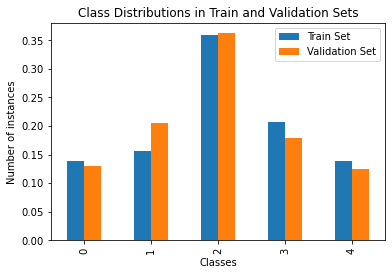

In [18]:
dist.plot(kind='bar')
plt.title('Class Distributions in Train and Validation Sets')
plt.xticks(ticks=list(range(5)), labels=list(range(5)))
plt.xlabel('Classes')
plt.ylabel('Number of instances')
plt.show()

We can see that the class distributions of train and validation sets are similar.

The Naive Bayes classifier uses the proportion of each class $P(Y = y_k)$ for the predictions. If the class distributions of train and validation sets are not similar, this will mislead the classifier since the train dataset does not represent the true class distribution as it is corrupted during the split of the dataset.

Also, if the number of training examples are not sufficient, the likelihoods can also be misleading as mentioned in the previous question. Some output probabilities of the model might be zero because of the training samples does not contain a class with one (or more) of the features.

## Question 2.1.4: If your dataset is skewed towards one of the classes, does this affect your reported accuracy? If yes, to what extent the reported accuracy is misleading in such an unbalanced dataset?

Though the accuracy metric is easy-to-interpret, it is not well-suited to assess the model performance on imbalanced datasets. For example, if the distribution of the data is 99%-1%, a model that predicts the majority class all the time achieves 99% accuracy. However, this model is not useful since it cannot correctly classify any examples from the minority class. Thus, accuracy is not a good metric for imbalanced classification tasks. Metrics like F1-score and F2-score (F-$\beta$ score in general) are better for these tasks since take the class imbalance into the account while evaluating the results. Plotting the confusion matrix might also be useful for imbalanced classification tasks to see how the model works on the minority class.

## Create the Naive Bayes Classifier class for Question 2.2 and Question 2.3

**This base class implements all the basic functionality of the Naive Bayes classifier.**

**For estimator = "mle", the classifier calculates maximum likelihood estimates (for Question 2).**

**For estimator = "map", the classifier calculates maximum a posteriori estimates (for Question 3). Though the question only wants the $\alpha = 1$ case, the following class implementation supports any $\alpha > 0$**

**Note that the only difference is the calculation of the likelihood. MAP estimation requires the addition of a some constant $\alpha$ to the number of occurences, whereas MLE does not have this addition of a constant.**

**calculate_pi function calculates the probabilities that any particular document belongs to the class $y_k \: \forall k\in\{0, 1, 2, 3, 4\}$**

In [19]:
def calculate_pi(data, label='class_label'):
    probs = data[[label]].value_counts(sort=False) / len(data)
    return np.log(probs.to_numpy())

**calculate_theta function calculates the likelihoods for MLE if $\alpha = 0$ and for MAP if $\alpha > 0$.**

**The $-\infty$ values are converted to a very small number for calculations by using np.nan_to_num function. The following cells illustrates how the function behaves for $-\infty$:**

In [20]:
np.nan_to_num(-np.inf)

-1.7976931348623157e+308

In [21]:
def calculate_theta(data, label='class_label', alpha=0):
    class_word_counts = data.groupby(by=label).sum() + alpha
    total_word_counts = class_word_counts.sum(axis=1)
    probs = class_word_counts.T / total_word_counts
    with np.errstate(divide='ignore'):
        logprobs = np.log(np.asarray(probs))
    logprobs = np.nan_to_num(logprobs)
    return logprobs

In [22]:
class NaiveBayesClassifier:
    def __init__(self, estimator, alpha=None):
        estimator = estimator.lower()

        self._pi = None
        self._theta = None
        if estimator != 'mle' and estimator != 'map':
            raise ValueError('Only MLE and MAP are supported.')
        if estimator == 'map':
            if alpha is None:
                raise ValueError('You have to specify alpha if the estimator is MAP.')
            elif alpha < 0:
                raise ValueError('alpha must be larger than 0.')
        self.estimator = estimator
        self.alpha = alpha if estimator == 'map' else 0
    
    @property
    def pi(self):
        return self._pi
    
    @property
    def theta(self):
        return self._theta
    
    def __str__(self):
        if self.estimator == 'mle':
            return f'NaiveBayesClassifier(estimator={self.estimator})'
        elif self.estimator == 'map':
            return f'NaiveBayesClassifier(estimator={self.estimator}, alpha={self.alpha})'
        else:
            return NotImplementedError()
        
    def __repr__(self):
        return str(self)
    
    def fit(self, data, label='class_label'):
        self._pi = calculate_pi(data, label)
        self._theta = calculate_theta(data, label, alpha=self.alpha)
        return self
    
    def predict(self, data, label='class_label'):
        scores = np.asarray(self.get_scores(data, label))
        return scores.argmax(axis=1)
        
    def get_scores(self, data, label='class_label'):
        if self.pi is None or self.theta is None:
            raise RuntimeError('The model is not fit.')
        return self.pi + data.drop(label, axis=1) @ self.theta
    
    def evaluate(self, data, label='class_label'):
        preds = self.predict(data, label)
        labels = data[label]
        return np.mean(preds == labels)
    
    def confusion_matrix(self, data, label='class_label'):
        labels = data[label]
        n_classes = labels.nunique()
        preds = self.predict(data, label)
        
        cm = np.zeros(shape=(n_classes, n_classes))
        for true, pred in zip(labels, preds):
            cm[true][pred] += 1
        
        return cm

## Question 2.2: Train a Multinomial Naive Bayes model on the training set and evaluate your model on the validation set given. Find and report the accuracy and the confusion matrix for the validation set, as well as how many wrong predictions were made.

### Create a Naive Bayes classifier that uses maximum likelihood estimator

In [23]:
nb_mle = NaiveBayesClassifier(estimator='mle')

### Fit the model

In [24]:
nb_mle.fit(data_train)

NaiveBayesClassifier(estimator=mle)

### Predict the classes for validation dataset

In [25]:
valid_pred_mle = nb_mle.predict(data_valid)
valid_pred_mle[:10]

array([0, 0, 0, 0, 4, 0, 0, 0, 2, 2])

### Evaluate the model by calculating prediction accuracy

In [26]:
nb_mle.evaluate(data_valid)

0.31351351351351353

### Create the confusion matrix

In [27]:
nb_mle.confusion_matrix(data_valid)

array([[24.,  0.,  0.,  0.,  0.],
       [33.,  5.,  0.,  0.,  0.],
       [45.,  0., 22.,  0.,  0.],
       [30.,  0.,  0.,  3.,  0.],
       [19.,  0.,  0.,  0.,  4.]])

**The low accuracy of this model is because of the zeros in the training set. When the model encounters a sample with a word W that it has not previously seen for a class C, the model gives zero probability to the case that the sample belongs to the class C. However, this might not be the case. Since there are many zero entries in the feature dataset, the model gives zero probability to those samples belonging to a class. Thus, many of the classes are misclassified as class 0 as the classifies the lower class in order in the case of a tie. This is also explained in Question 2.4.**

## Question 2.3: Extend your classifier so that it can compute a MAP estimate of θ parameters using a fair Dirichlet prior.

### Create a Naive Bayes classifier that uses maximum a posteriori estimator using a Dirichlet prior with $\alpha = 1$

In [28]:
nb_map = NaiveBayesClassifier(estimator='map', alpha=1)

### Fit the model

In [29]:
nb_map.fit(data_train)

NaiveBayesClassifier(estimator=map, alpha=1)

### Predict the classes for validation dataset

In [30]:
nb_map.predict(data_valid)

array([4, 2, 1, 2, 4, 0, 0, 1, 2, 2, 1, 3, 3, 1, 0, 3, 1, 2, 3, 3, 3, 1,
       2, 1, 3, 2, 3, 4, 3, 2, 3, 2, 1, 1, 3, 2, 2, 1, 2, 1, 2, 0, 1, 4,
       3, 4, 4, 4, 2, 2, 2, 4, 2, 4, 0, 1, 0, 1, 2, 4, 0, 0, 2, 0, 3, 2,
       1, 0, 2, 3, 0, 4, 0, 0, 3, 1, 2, 2, 4, 2, 2, 2, 2, 2, 3, 4, 2, 2,
       4, 0, 2, 0, 2, 4, 3, 2, 1, 1, 0, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 3,
       2, 1, 4, 0, 3, 2, 2, 3, 2, 2, 1, 3, 0, 1, 2, 3, 2, 3, 1, 1, 4, 2,
       1, 3, 4, 3, 1, 2, 2, 3, 2, 3, 2, 2, 4, 3, 0, 2, 3, 4, 3, 3, 3, 2,
       1, 2, 0, 2, 2, 2, 0, 3, 2, 2, 3, 2, 2, 1, 2, 0, 3, 1, 1, 2, 0, 0,
       4, 2, 2, 3, 2, 0, 4, 2, 2])

### Evaluate the model by calculating prediction accuracy

In [31]:
nb_map.evaluate(data_valid)

0.972972972972973

### Create the confusion matrix

In [32]:
nb_map.confusion_matrix(data_valid)

array([[24.,  0.,  0.,  0.,  0.],
       [ 0., 35.,  1.,  2.,  0.],
       [ 0.,  0., 66.,  1.,  0.],
       [ 0.,  0.,  0., 33.,  0.],
       [ 1.,  0.,  0.,  0., 22.]])

## Question 2.4: Comparing the two models you trained, how does the Dirichlet prior α effects your model? Also, interpret the structure of the dataset. Given that the dataset does not include stop words, why are the two models different? Explain by giving references to your results. You can also benefit from the statistical structure of the feature matrix.

For clarity, let $\alpha$ denote a word and $\psi$ denote a class. When the Diriclet prior is not used, it might be the case that there is no samples from class $\psi$ that contains the word $\alpha$. Then, if there is a new sample which contains the word $\alpha$, the model will output zero for that sample being in the class $\psi$. By adding the prior, we prevent the model output to be zero. The outputs become small numbers instead.

For example, the confusion matrix for the MLE estimation (without the prior) shows that most of the samples are misclassified as class 0 since we predict the class that is lower in order in the case of ties.

In the following cell, we see that there are many zero entries for each feature. This causes many of the outputs of the model to be zero when the model encounters new samples with that word. This causes ties and the model misclassifies the examples as class 0 as it is the class that is lower in order.

In [33]:
np.where(data_train.groupby('class_label').sum() == 0, 1, 0).sum(axis=0)[:100]

array([4, 2, 0, 0, 2, 1, 4, 4, 0, 0, 0, 0, 2, 0, 3, 1, 1, 0, 4, 3, 0, 0,
       0, 0, 3, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 2, 0, 0, 0, 0, 3, 2, 4, 0, 1, 2, 4, 3, 0, 0, 0, 0, 1, 0,
       2, 0, 0, 0, 2, 0, 3, 0, 0, 0, 2, 0, 0, 2, 0, 3, 0, 4, 2, 1, 0, 0,
       2, 1, 1, 4, 3, 0, 0, 1, 0, 0, 2, 0])

The following cell shows the output of the model on the validation dataset. We see that there are many $-\infty$ values. For many samples, all the probabilites are $-\infty$, and thus, the model misclassifies the samples as class 0 (the class that is lower in order.)

In [34]:
nb_mle.get_scores(data_valid)

,0,1,2,3,4
0,-inf,-inf,-inf,-inf,-inf
1,-inf,-inf,-inf,-inf,-inf
2,-inf,-inf,-inf,-inf,-inf
3,-inf,-inf,-inf,-inf,-inf
4,-inf,-inf,-inf,-inf,-1.797693e+308
...,...,...,...,...,...
180,-inf,-inf,-inf,-inf,-inf
181,-inf,-inf,-inf,-inf,-inf
182,-inf,-inf,-inf,-inf,-inf
183,-inf,-inf,-inf,-inf,-inf


In the following cell, we can observe the effect of the prior $\alpha$. There are no $-\infty$ values since there is no zeros in the likelihoods.

In [35]:
nb_map.get_scores(data_valid)

,0,1,2,3,4
0,-1233.060177,-1231.921015,-1230.522389,-1235.827373,-1047.088547
1,-1181.419956,-1169.898431,-1068.447380,-1151.796023,-1145.649153
2,-7657.717286,-6557.608205,-7639.532552,-7615.212454,-7564.218066
3,-1162.495946,-1178.713996,-1089.896843,-1164.804730,-1194.167169
4,-1032.608840,-1050.741549,-1026.161416,-1041.338716,-891.342299
...,...,...,...,...,...
180,-2179.998139,-2152.516462,-1888.579209,-2145.308897,-2127.739230
181,-3078.034078,-3748.081551,-3675.843914,-3689.441685,-3512.934664
182,-848.301695,-835.398349,-841.306372,-830.082663,-757.861411
183,-1751.711495,-1788.459220,-1502.930022,-1731.814688,-1744.487264
